In [2]:
import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim

def compare_ssim(image1_path, image2_path):
    start_time = time.time()

    # Load images and convert to grayscale
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Resize to match
    gray2 = cv2.resize(gray2, (gray1.shape[1], gray1.shape[0]))

    # Compute SSIM score
    score, diff = ssim(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")

    end_time = time.time()
    print(f"SSIM Inference Time: {end_time - start_time:.4f} seconds")

    return score, diff

def compare_orb(image1_path, image2_path):
    start_time = time.time()

    # Load images and convert to grayscale
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Resize to same size
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Create BFMatcher and match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Calculate match quality score
    total_distance = sum(m.distance for m in matches)
    match_score = total_distance / len(matches) if matches else float('inf')

    # Draw matches for visualization (optional)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

    end_time = time.time()
    print(f"ORB Inference Time: {end_time - start_time:.4f} seconds")

    return match_score, img_matches


In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"



In [4]:
compare_orb('c1.jpg','c2.jpg')


ORB Inference Time: 1.1169 seconds


(26.58543417366947,
 array([[[ 5,  5,  5],
         [ 5,  5,  5],
         [ 5,  5,  5],
         ...,
         [ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6]],
 
        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [ 5,  5,  5],
         [ 5,  5,  5],
         [ 4,  4,  4]],
 
        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 7,  7,  7],
         ...,
         [ 6,  6,  6],
         [ 5,  5,  5],
         [ 5,  5,  5]],
 
        ...,
 
        [[15, 15, 15],
         [15, 15, 15],
         [14, 14, 14],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [13, 13, 13]],
 
        [[14, 14, 14],
         [14, 14, 14],
         [15, 15, 15],
         ...,
         [12, 12, 12],
         [12, 12, 12],
         [13, 13, 13]],
 
        [[12, 12, 12],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [13, 13, 13],
         [12, 12, 12],
         [13, 13, 13]]], dtype=uint8))

In [5]:
compare_ssim('c1.jpg','c2.jpg')

SSIM Inference Time: 0.0635 seconds


(0.9445054839193294,
 array([[252, 251, 251, ..., 243, 245, 248],
        [252, 251, 251, ..., 242, 244, 247],
        [252, 251, 251, ..., 244, 246, 248],
        ...,
        [220, 217, 220, ..., 244, 242, 242],
        [237, 231, 231, ..., 245, 244, 244],
        [244, 236, 235, ..., 246, 246, 247]], dtype=uint8))

In [6]:
def resize_for_display(image, max_width=600, max_height=400):
    height, width = image.shape[:2]
    scale = min(max_width / width, max_height / height)
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)


In [7]:
ssim_score, ssim_diff = compare_ssim('ref_000.png','c1.jpg')
print(f"SSIM Score: {ssim_score:.4f}")

orb_score, orb_visual = compare_orb('ref_000.png','c1.jpg')
print(f"ORB Match Score (lower is better): {orb_score:.2f}")

# Resize for display
ssim_diff_resized = resize_for_display(ssim_diff)
orb_visual_resized = resize_for_display(orb_visual)

# Show in windows
cv2.imshow("SSIM Difference", ssim_diff_resized)
cv2.imshow("ORB Matches", orb_visual_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()





SSIM Inference Time: 0.2084 seconds
SSIM Score: 0.2347
ORB Inference Time: 0.0477 seconds
ORB Match Score (lower is better): 66.25


In [8]:
import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim

def compare_ssim(image1_path, image2_path):
    start_time = time.time()
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.resize(gray2, (gray1.shape[1], gray1.shape[0]))
    score, diff = ssim(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")
    inference_time = time.time() - start_time
    print(f"SSIM Inference Time: {inference_time:.4f} seconds")
    return score, diff

def compare_orb(image1_path, image2_path):
    start_time = time.time()
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    score = sum(m.distance for m in matches) / len(matches) if matches else float('inf')
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)
    inference_time = time.time() - start_time
    print(f"ORB Inference Time: {inference_time:.4f} seconds")
    return score, img_matches

def compare_akaze(image1_path, image2_path):
    start_time = time.time()
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    akaze = cv2.AKAZE_create()
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    score = sum(m.distance for m in matches) / len(matches) if matches else float('inf')
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)
    inference_time = time.time() - start_time
    print(f"AKAZE Inference Time: {inference_time:.4f} seconds")
    return score, img_matches

def pixel_diff(image1_path, image2_path):
    start_time = time.time()
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    diff = cv2.absdiff(img1, img2)
    gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_diff, 25, 255, cv2.THRESH_BINARY)
    non_zero = cv2.countNonZero(thresh)
    inference_time = time.time() - start_time
    print(f"Pixel Difference Inference Time: {inference_time:.4f} seconds")
    return non_zero, thresh

def mean_squared_error(image1_path, image2_path):
    start_time = time.time()
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    mse = np.mean((img1.astype("float") - img2.astype("float")) ** 2)
    inference_time = time.time() - start_time
    print(f"MSE Inference Time: {inference_time:.4f} seconds")
    return mse

def edge_difference(image1_path, image2_path):
    start_time = time.time()
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    edges1 = cv2.Canny(img1, 100, 200)
    edges2 = cv2.Canny(img2, 100, 200)
    diff = cv2.absdiff(edges1, edges2)
    inference_time = time.time() - start_time
    print(f"Edge Difference Inference Time: {inference_time:.4f} seconds")
    return diff

def resize_for_display(image, max_width=600, max_height=400):
    height, width = image.shape[:2]
    scale = min(max_width / width, max_height / height)
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

# ==== Main Execution ====
img_ref = 'ref_000.png'
img_test = '004.png'

# SSIM
ssim_score, ssim_diff = compare_ssim(img_ref, img_test)
print(f"SSIM Score: {ssim_score:.4f}")

# ORB
orb_score, orb_visual = compare_orb(img_ref, img_test)
print(f"ORB Match Score: {orb_score:.2f}")

# AKAZE
akaze_score, akaze_visual = compare_akaze(img_ref, img_test)
print(f"AKAZE Match Score: {akaze_score:.2f}")

# Pixel Difference
pixel_score, pixel_visual = pixel_diff(img_ref, img_test)
print(f"Pixel Diff (non-zero pixels): {pixel_score}")

# MSE
mse_score = mean_squared_error(img_ref, img_test)
print(f"MSE Score: {mse_score:.2f}")

# Edge Difference
edge_diff_img = edge_difference(img_ref, img_test)

# ==== Display Results ====
cv2.imshow("SSIM Difference", resize_for_display(ssim_diff))
cv2.imshow("ORB Matches", resize_for_display(orb_visual))
cv2.imshow("AKAZE Matches", resize_for_display(akaze_visual))
cv2.imshow("Pixel Difference", resize_for_display(pixel_visual))
cv2.imshow("Edge Difference", resize_for_display(edge_diff_img))
cv2.waitKey(0)
cv2.destroyAllWindows()



SSIM Inference Time: 0.1623 seconds
SSIM Score: 0.8865
ORB Inference Time: 0.0548 seconds
ORB Match Score: 34.74
AKAZE Inference Time: 0.2508 seconds
AKAZE Match Score: 23.38
Pixel Difference Inference Time: 0.0428 seconds
Pixel Diff (non-zero pixels): 12991
MSE Inference Time: 0.0693 seconds
MSE Score: 49.72
Edge Difference Inference Time: 0.0415 seconds


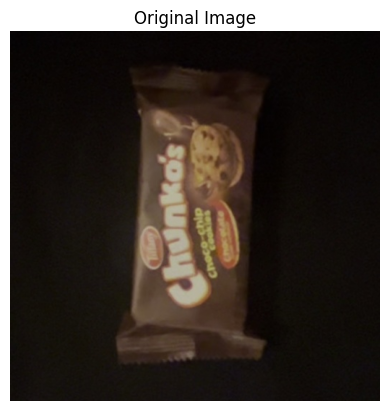

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# Load your image (ensure it's in the same folder as your notebook)
image_path = "c1.jpg"  # replace with your image filename
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [15]:
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
predictor = SamPredictor(sam)
sam.to(device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [16]:
import time
# Load your image
image_path = "c1.jpg"
image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load SAM model
predictor.set_image(image)


Inference Time: 0.138 seconds


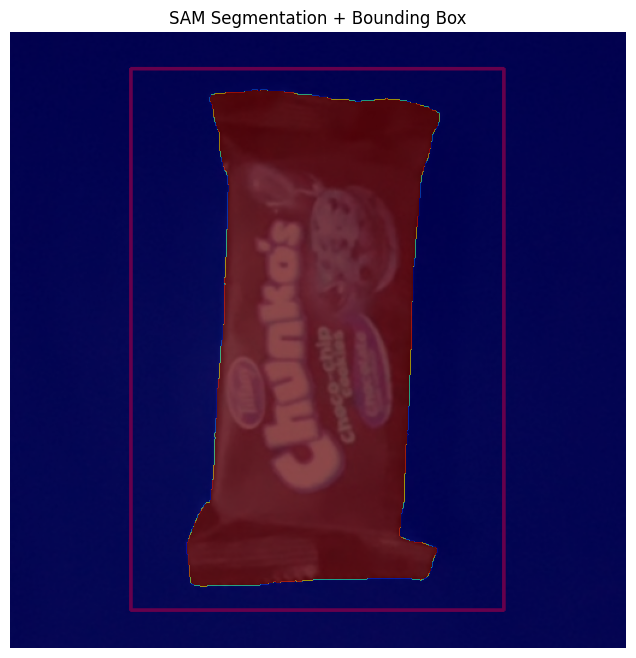

In [17]:
# Define bounding box (x1, y1, x2, y2)
input_box = np.array([[100, 30, 410, 480]])

# Measure inference time
start_time = time.time()
masks, scores, logits = predictor.predict(box=input_box)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.3f} seconds")

# Visualization with bounding box and mask
def show_mask_with_box(mask, image, box, alpha=0.6):
    image_copy = image.copy()
    x1, y1, x2, y2 = box[0]
    
    # Draw bounding box
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image_copy)
    plt.imshow(mask, alpha=alpha, cmap='jet')
    plt.axis("off")
    plt.title("SAM Segmentation + Bounding Box")
    plt.show()

# Show result
show_mask_with_box(masks[0], image, input_box)

Inference Time: 0.097 seconds
Original image shape:   (512, 512) (H x W)
Segmented image shape:  (512, 512) (H x W)
Cropped object shape:   (412, 209) (H x W)


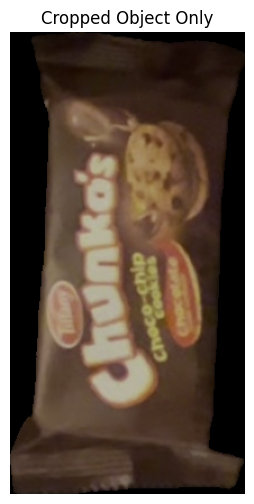

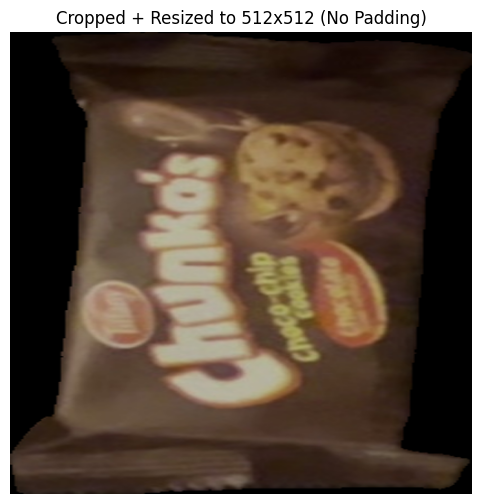

Final resized shape: (512, 512) (H x W)


In [21]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assume 'image' and 'predictor' are already defined in your context

# Define bounding box (x1, y1, x2, y2)
input_box = np.array([[100, 30, 410, 480]])

# Measure inference time
start_time = time.time()
masks, scores, logits = predictor.predict(box=input_box)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.3f} seconds")

# Step 1: Remove background (apply SAM mask)
segmented = image.copy()
segmented[~masks[0]] = 0  # mask is boolean, same shape as image

# Step 2: Get bounding box from mask to crop only the object
# Step 2: Get bounding box from mask to crop only the object
ys, xs = np.where(masks[0])
if len(xs) == 0 or len(ys) == 0:
    raise ValueError("No object detected in mask")

x1, y1 = np.min(xs), np.min(ys)
x2, y2 = np.max(xs), np.max(ys)
cropped = segmented[y1:y2, x1:x2]

# ✅ Resize directly to 512x512 (no padding)
cropped_resized = cv2.resize(cropped, (512, 512), interpolation=cv2.INTER_CUBIC)

# Step 3: Print resolution info
print(f"Original image shape:   {image.shape[:2]} (H x W)")
print(f"Segmented image shape:  {segmented.shape[:2]} (H x W)")
print(f"Cropped object shape:   {cropped.shape[:2]} (H x W)")

# Step 4: Visualize the cropped result
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Object Only")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped_resized, cv2.COLOR_BGR2RGB))
plt.title("Cropped + Resized to 512x512 (No Padding)")
plt.axis("off")
plt.show()

print(f"Final resized shape: {cropped_resized.shape[:2]} (H x W)")



In [8]:
def display_cv_image(img, window_name="Image"):
    max_size = 1024
    h, w = img.shape[:2]
    scale = min(max_size / w, max_size / h)

    if scale < 1.0:  # Resize only if image is larger than max_size
        new_w, new_h = int(w * scale), int(h * scale)
        img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [9]:
import cv2
import numpy as np
import pytesseract
import time
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
def combine_detected_segments(image_path, ground_truth=None, display_steps=True):
    """
    Alternative approach: Detect the entire text first, then segment it based on 
    spaces or known patterns, and annotate each segment separately.
    
    Args:
        image_path: Path to the input image
        ground_truth: Optional ground truth text for accuracy evaluation
        display_steps: If True, display intermediate processing steps
    
    Returns:
        Annotated image with text segments highlighted and labeled,
        detected word positions, and performance metrics
    """
    # Start timing
    start_time = time.time()
    
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not read image at {image_path}")
    
    result = img.copy()
    
    # Display original image
    if display_steps:
        print("Original Image:")
        display_cv_image(img)
    
    # Preprocess for better recognition
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.convertScaleAbs(gray, alpha=1.0, beta=0.05) 
    # Resize to improve OCR accuracy
    scale_factor = 2
    gray_resized = cv2.resize(gray, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
    
    if display_steps:
        print("Resized Grayscale Image:")
        display_cv_image(gray_resized)
    
    # Apply threshold
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # For digits with connecting strokes like 4
    kernel = np.ones((2, 2), np.uint8)
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # For digits with loops like 5 and 9
    kernel = np.ones((1, 1), np.uint8)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    if display_steps:
        print("Binary Image:")
        display_cv_image(closed)
    
    # Start timing OCR inference
    inference_start = time.time()
    
    # Get the entire text
    custom_config = r'--oem 3 --psm 3 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ: '
    ocr_data = pytesseract.image_to_data(closed, output_type=pytesseract.Output.DICT)
    ocr_data
    text = ocr_data['text']
    text_conf = [text[i] for i in range(len(text)) if ocr_data['conf'][i]>=40]
    full_text = " ".join(text_conf)
    
    # End timing OCR inference
    inference_end = time.time()
    inference_time = inference_end - inference_start
    
    # Split by spaces to get segments
    segments = full_text.split()
    print(f"Detected full text: '{full_text}'")
    print(f"Segments: {segments}")
    print(f"OCR inference time: {inference_time:.4f} seconds")
    
    # Get detailed OCR data to find word positions
    #ocr_data = pytesseract.image_to_data(closed, output_type=pytesseract.Output.DICT)
    #print(ocr_data)
    
    # Create a resized result image for annotation
    result_resized = cv2.resize(result, None, fx=1, fy=1, interpolation=cv2.INTER_CUBIC)
    
    # Process each word from OCR data
    detected_word_positions = []
    
    for i in range(len(ocr_data['text'])):
        word = ocr_data['text'][i].strip()
        
        # Only process non-empty words with sufficient confidence
        if word and int(ocr_data['conf'][i]) >= 40:
            # Extract box coordinates
            x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
            
            # Draw box
            cv2.rectangle(result_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            # Add text label
            cv2.putText(result_resized, word, (x, y - 10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            detected_word_positions.append((word, (x, y, w, h)))
            print(f"Word '{word}' found at (x={x}, y={y}, w={w}, h={h})")
    
    if display_steps:
        print("Detected Words with Bounding Boxes:")
        display_cv_image(result_resized)
    
    # Resize back to original dimensions
    result = cv2.resize(result_resized, (img.shape[1], img.shape[0]))
    
    print("\nFinal Result (resized back to original dimensions):")
    display_cv_image(result)
    
    # End timing for total process
    end_time = time.time()
    total_time = end_time - start_time
    
    # Performance metrics
    performance = {
        'total_time': total_time,
        'total_segments': len(detected_word_positions),
        'inference_time': inference_time,
        'avg_inference_time': inference_time  # For consistent metrics structure with the first method
    }
    
    print(f"\nPerformance Metrics:")
    print(f"Total processing time: {total_time:.4f} seconds")
    print(f"OCR inference time: {inference_time:.4f} seconds")
    
    # Calculate accuracy if ground truth is provided
    # if ground_truth:
    #     accuracy_metrics = calculate_character_accuracy(full_text, ground_truth)
    #     performance.update(accuracy_metrics)
        
    #     print(f"\nAccuracy Metrics:")
    #     print(f"Character accuracy: {accuracy_metrics['character_accuracy']:.2f}%")
    #     print(f"Precision: {accuracy_metrics['precision']:.2f}%")
    #     print(f"Recall: {accuracy_metrics['recall']:.2f}%")
    #     print(f"F1 Score: {accuracy_metrics['f1_score']:.2f}%")
    #     print(f"Levenshtein distance: {accuracy_metrics['levenshtein_distance']}")
    
    return result, detected_word_positions, performance



In [10]:
combine_detected_segments(image_path = 'output.jpg')

Original Image:
Resized Grayscale Image:
Binary Image:
Detected full text: ''
Segments: []
OCR inference time: 0.1726 seconds
Detected Words with Bounding Boxes:

Final Result (resized back to original dimensions):

Performance Metrics:
Total processing time: 11.1374 seconds
OCR inference time: 0.1726 seconds


(array([[[178, 187, 184],
         [177, 186, 183],
         [176, 185, 182],
         ...,
         [ 96, 100, 111],
         [ 95,  99, 110],
         [ 94,  98, 109]],
 
        [[179, 188, 185],
         [178, 187, 184],
         [177, 186, 183],
         ...,
         [ 96, 100, 111],
         [ 97, 101, 112],
         [ 97, 101, 112]],
 
        [[178, 187, 184],
         [177, 186, 183],
         [177, 186, 183],
         ...,
         [ 95,  99, 110],
         [ 96, 100, 111],
         [ 96, 100, 111]],
 
        ...,
 
        [[ 72,  77,  76],
         [ 72,  77,  76],
         [ 72,  77,  76],
         ...,
         [ 46,  53,  56],
         [ 46,  53,  56],
         [ 45,  52,  55]],
 
        [[ 71,  75,  76],
         [ 71,  75,  76],
         [ 71,  75,  76],
         ...,
         [ 46,  53,  56],
         [ 46,  53,  56],
         [ 46,  53,  56]],
 
        [[ 70,  74,  75],
         [ 71,  75,  76],
         [ 71,  75,  76],
         ...,
         [ 46,  53,  56],
  